<a href="https://colab.research.google.com/github/KOOLPLUG/NarrAItives/blob/main/NarrAItives_ver_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# All required packages for your project
packages = [
    "streamlit",        # Web app framework
    "transformers",     # Hugging Face NLP models
    "torch",            # Backend for transformers
    "newspaper3k",      # Extract news article text
    "beautifulsoup4",   # HTML parsing for newspaper3k
    "lxml",             # XML/HTML parsing for newspaper3k
    "requests"          # HTTP requests (used internally, but safe to install)
]

print("Installing all required packages...")
os.system(f"pip install {' '.join(packages)}")

print("\n✅ All packages installed successfully!")

Installing all required packages...

✅ All packages installed successfully!


In [ ]:
import os
from google.colab import userdata

# Fetch Hugging Face token from Colab secrets
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')
print("Hugging Face token set successfully.")

Hugging Face token set successfully.


In [ ]:
import requests
import os

API_URL = "https://router.huggingface.co/hf-inference/models/facebook/bart-large-mnli"
headers = {
    "Authorization": f"Bearer {os.environ['HF_TOKEN']}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

output = query({
    "inputs": "Hi, I recently bought a device from your company but it is not working as advertised and I would like to get reimbursed!",
    "parameters": {"candidate_labels": ["refund", "legal", "faq"]},
})

print(output)

{'error': 'Invalid credentials in Authorization header'}


In [ ]:
import requests
import os

API_URL = "https://router.huggingface.co/hf-inference/models/facebook/bart-large-mnli"
headers = {
    "Authorization": f"Bearer {os.environ['HF_TOKEN']}",
}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

output = query({
    "inputs": "Hi, I recently bought a device from your company but it is not working as advertised and I would like to get reimbursed!",
    "parameters": {"candidate_labels": ["refund", "legal", "faq"]},
})

print(output)

{'error': 'Invalid credentials in Authorization header'}


In [ ]:
import os

print("Installing lxml_html_clean...")
os.system("pip install lxml_html_clean")

print("\n✅ lxml_html_clean installed successfully!")

Installing lxml_html_clean...

✅ lxml_html_clean installed successfully!


In [ ]:
import streamlit as st
from newspaper import Article

st.title("News Article Analysis")

url = st.text_input("Enter the URL of a news article:")

article_text = ""
if url:
    try:
        article = Article(url)
        article.download()
        article.parse()
        article_text = article.text
        st.write("Article text fetched successfully:")
        st.write(article_text)
    except Exception as e:
        st.error(f"Error fetching article: {e}")

2025-08-06 23:07:43.979 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 23:07:44.146 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-06 23:07:44.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 23:07:44.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 23:07:44.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 23:07:44.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 23:07:44.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 23:07:44.155 Thread 'MainThread': mi

In [ ]:
%%writefile app.py
import streamlit as st
from newspaper import Article

st.title("News Article Analysis")

url = st.text_input("Enter the URL of a news article:")

article_text = ""
if url:
    try:
        article = Article(url)
        article.download()
        article.parse()
        article_text = article.text
        st.write("Article text fetched successfully:")
        st.write(article_text)
    except Exception as e:
        st.error(f"Error fetching article: {e}")

Writing app.py


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import os

# Ensure HF_TOKEN is set in the environment
# If you haven't set it using the previous cell, you can do it here:
# os.environ['HF_TOKEN'] = 'YOUR_HF_TOKEN' # Replace 'YOUR_HF_TOKEN' with your actual token

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli", token=os.environ['HF_TOKEN'])
model = AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli", token=os.environ['HF_TOKEN'])

print("Model and tokenizer loaded successfully for local inference.")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Model and tokenizer loaded successfully for local inference.


In [ ]:
from transformers import pipeline
import os

classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", token=os.environ['HF_TOKEN'])

print("Zero-shot classification pipeline created successfully.")

Device set to use cpu


Zero-shot classification pipeline created successfully.


In [ ]:
#news article fetch
from newspaper import Article

url = input("Please enter the URL of a news article: ")

article_text = ""
if url:
    try:
        article = Article(url)
        article.download()
        article.parse()
        article_text = article.text
        print("\nArticle text fetched successfully:")
        print(article_text)
    except Exception as e:
        print(f"Error fetching article: {e}")
else:
    print("No URL entered.")

Please enter the URL of a news article: https://www.aljazeera.com/news/2025/8/6/trump-imposes-25-percent-tariff-on-indian-goods-over-russian-oil

Article text fetched successfully:
Trump cited ‘national security’ concerns as a reason for the import tax hike, raising tensions in US-India relations.

United States President Donald Trump has issued an executive order imposing an additional 25 percent tariff on goods from India, as penalty for importing Russian oil.

Wednesday’s hike comes in addition to the 25 percent tariff India already faces, making it subject to one of the US’s highest import tax brackets under Trump, at a total of 50 percent.

In his executive order, Trump explained that Russia’s continued military actions in Ukraine constituted a “national emergency” and it was therefore “necessary and appropriate” to place heightened tariffs on India, a major consumer of its petroleum products.

“I find that the Government of India is currently directly or indirectly importing Russ

In [ ]:
#narrative rhetoric labels
sequence_to_classify = article_text
narrative_rhetoric_labels = ['Neutral / Everyday Event: Article describes ordinary events such as business openings, cultural celebrations, or routine community updates without political, ideological, or conflict-driven framing',
    'Unclear or Minimal Rhetoric: Article lacks enough information to determine a strong persuasive or ideological framing. Statements are mostly factual or ambiguous without clear narrative intent' ,
    'Us vs Them: Frames one group as morally superior and the other as dangerous, inferior or untrustworthy.',
    'Exceptionalism: Claims a nation or group is unique, morally superior, or destined for a special role in the world.',
    'Security Threat Inflation: Exaggerates or amplifies the scale of a threat to justify urgent or extreme action.',
    'Humanitarian Pretext: Presents intervention or policy as purely altruistic and compassionate, masking strategic goals.',
    'Moral Panic / Outrage: Focuses on moral or ethical violations to spark strong emotional reactions in the public.',
    'Victimhood / Persecution Narrative: Portrays own group as unfairly targeted, oppressed, or under attack.',
    'Destiny & Progress: Frames events as part of inevitable historical progress or being on the right side of history',
    'Unity Against a Common Enemy: Calls for cohesion and solidarity by identifying and opposing a shared adversary.']
classification_results = classifier(sequence_to_classify, narrative_rhetoric_labels, multi_label=True)

print(classification_results)

{'sequence': 'Trump cited ‘national security’ concerns as a reason for the import tax hike, raising tensions in US-India relations.\n\nUnited States President Donald Trump has issued an executive order imposing an additional 25 percent tariff on goods from India, as penalty for importing Russian oil.\n\nWednesday’s hike comes in addition to the 25 percent tariff India already faces, making it subject to one of the US’s highest import tax brackets under Trump, at a total of 50 percent.\n\nIn his executive order, Trump explained that Russia’s continued military actions in Ukraine constituted a “national emergency” and it was therefore “necessary and appropriate” to place heightened tariffs on India, a major consumer of its petroleum products.\n\n“I find that the Government of India is currently directly or indirectly importing Russian Federation oil,” Trump wrote.\n\n“The actions and policies of the Government of the Russian Federation continue to pose an unusual and extraordinary threat

/tmp/ipython-input-1235435217.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


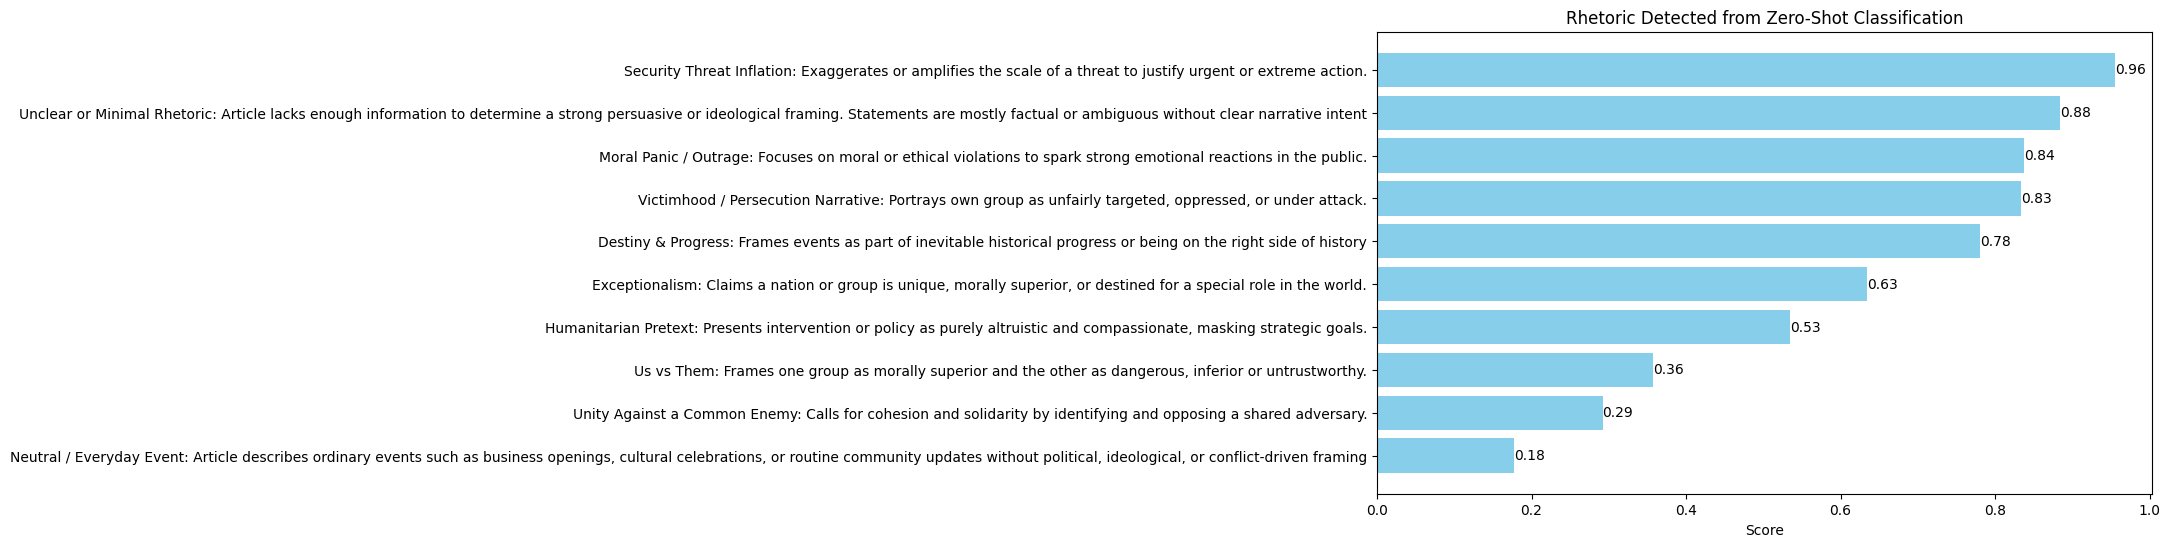

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming classification_results is available from the previous step
# For plotting, it's helpful to have the data in a structured format like a pandas DataFrame
results_df = pd.DataFrame({
    'Label': classification_results['labels'],
    'Score': classification_results['scores']
})

# Sort the DataFrame by score for better visualization
results_df = results_df.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(results_df['Label'], results_df['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Rhetoric Detected from Zero-Shot Classification')
plt.gca().invert_yaxis() # To show the highest score at the top

# Add the score values as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming analysis_results is available from the previous step
if 'analysis_results' in locals() and analysis_results and 'all_scores' in analysis_results:
    # Convert the all_scores dictionary to a pandas DataFrame for plotting
    results_df = pd.DataFrame(list(analysis_results['all_scores'].items()), columns=['Label', 'Score'])

    # Sort the DataFrame by score for better visualization
    results_df = results_df.sort_values(by='Score', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(results_df['Label'], results_df['Score'], color='gray') # Changed color to 'gray'
    plt.xlabel('Score')
    plt.title('Rhetoric Detected from Zero-Shot Classification')
    plt.gca().invert_yaxis() # To show the highest score at the top

    # Add the score values as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("Error: analysis_results not found or does not contain 'all_scores'. Please run the analysis cell first.")

In [ ]:
#appeal labels
appeal_type_labels = [
    'Emotional appeal/ pathos: targets fear, pride, anger, compassion, hope, justice, jealousy, love, patriotism, pity, sympathy, vivid language,  eg: our way of life is under threat' ,
    'Logical/ pragmatic appeal/ logos: uses statistics, facts, rational arguments, reason, evidence, logic, anecdotes, case studies, analogies, comparisons, cause and effect, proof, eg: data shows crime has doubled' ,
    'Credibility appeal/ ethos: leans on authority, moral standing, expertise, impartiality, confidence in delivery, honesty, fairness, reliability, trustworthy, educated, cites credible sources, reputation'
]

# Assuming article_text is available from the previous cell execution
if 'article_text' in locals() and article_text:
    appeal_classification_results = classifier(article_text, appeal_type_labels, multi_label=True)
    print(appeal_classification_results)
else:
    print("Error: article_text not found. Please run the cell to fetch the article first.")

{'sequence': 'Trump cited ‘national security’ concerns as a reason for the import tax hike, raising tensions in US-India relations.\n\nUnited States President Donald Trump has issued an executive order imposing an additional 25 percent tariff on goods from India, as penalty for importing Russian oil.\n\nWednesday’s hike comes in addition to the 25 percent tariff India already faces, making it subject to one of the US’s highest import tax brackets under Trump, at a total of 50 percent.\n\nIn his executive order, Trump explained that Russia’s continued military actions in Ukraine constituted a “national emergency” and it was therefore “necessary and appropriate” to place heightened tariffs on India, a major consumer of its petroleum products.\n\n“I find that the Government of India is currently directly or indirectly importing Russian Federation oil,” Trump wrote.\n\n“The actions and policies of the Government of the Russian Federation continue to pose an unusual and extraordinary threat

/tmp/ipython-input-213636677.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


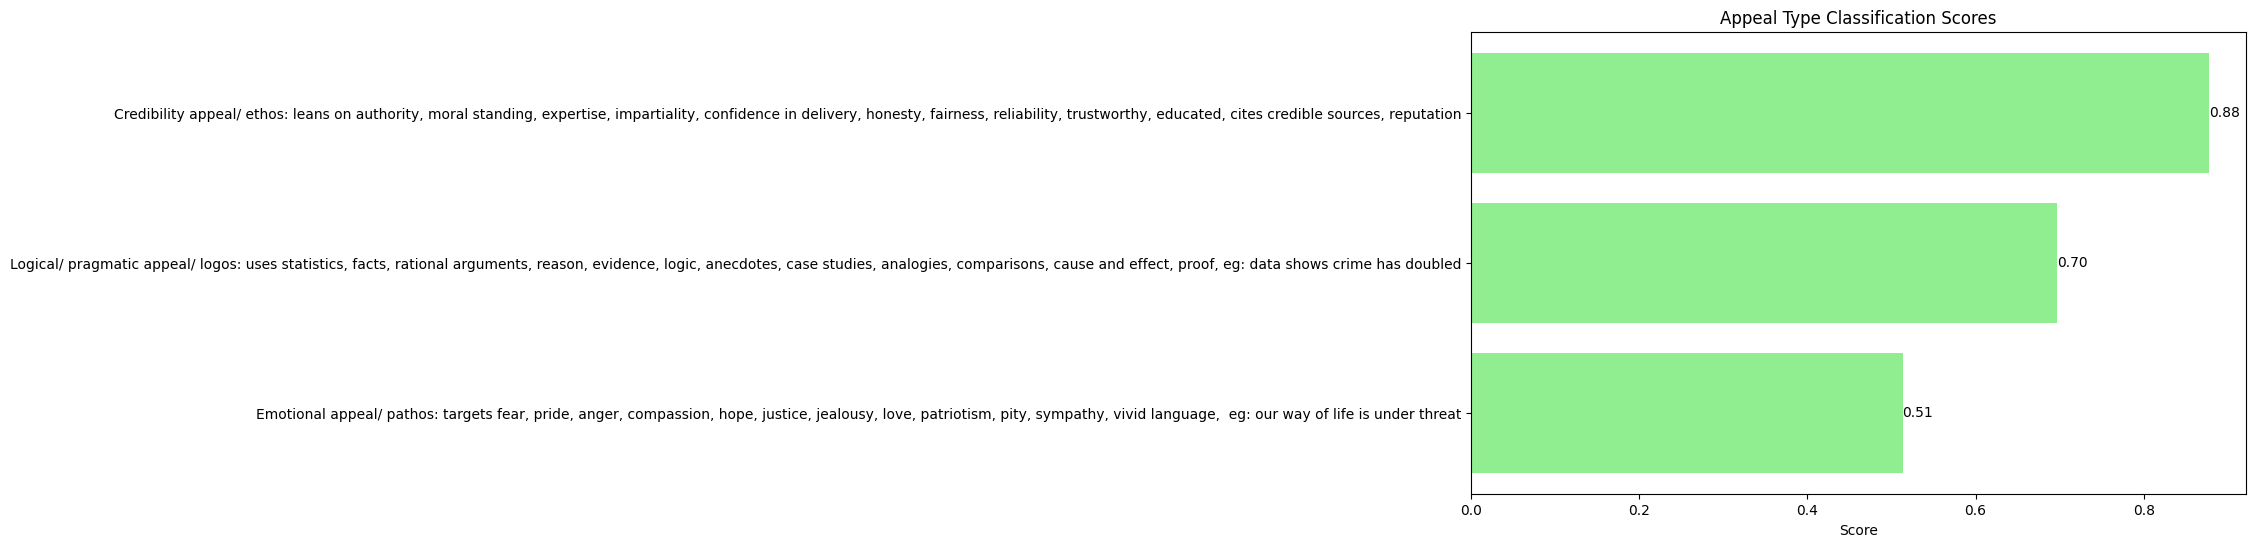

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming appeal_classification_results is available from the previous step
if 'appeal_classification_results' in locals() and appeal_classification_results:
    # Convert the results to a pandas DataFrame for plotting
    appeal_results_df = pd.DataFrame({
        'Label': appeal_classification_results['labels'],
        'Score': appeal_classification_results['scores']
    })

    # Extract label name before '|' for plotting
    appeal_results_df['Short_Label'] = appeal_results_df['Label'].apply(lambda x: x.split(' |')[0] if ' |' in x else x)


    # Sort the DataFrame by score for better visualization
    appeal_results_df = appeal_results_df.sort_values(by='Score', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(appeal_results_df['Short_Label'], appeal_results_df['Score'], color='lightgreen')
    plt.xlabel('Score')
    plt.title('Appeal Type Classification Scores')
    plt.gca().invert_yaxis() # To show the highest score at the top

    # Add the score values as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("Error: appeal_classification_results not found. Please run the appeal type classification cell first.")

In [ ]:
target_audience_labels = [
    "Nationalists / Patriots: Citizens who value national pride, sovereignty, and cultural identity: Exceptionalism, Us vs Them, Unity Against a Common Enemy",
    "Security‑Conscious Citizens: People prioritizing public safety, stability, and protection from threats: Security Threat Inflation, Us vs Them",
    "Humanitarians / Compassionate Public: Individuals motivated by empathy, fairness, and human rights concerns: Humanitarian Pretext, Victimhood Narratives",
    "Progress‑Oriented Groups: People inspired by innovation, reform, and long‑term vision: Destiny & Progress, Innovation Narratives",
    "Culturally Conservative Groups: Communities seeking to preserve traditional values, customs, or religion: Cultural Preservation, Identity Appeals",
    "Economically Concerned Citizens: Those focused on job security, trade, and financial wellbeing: Economic Threat, Prosperity Narratives",
    "Political Activists / Partisans: Citizens aligned strongly with a political ideology or movement: Moral Panic / Outrage, Us vs Them",
    "Internationally Minded Citizens: People engaged with global cooperation, diplomacy, or multiculturalism: Humanitarian, Progress, Cooperative Narratives"
]

# Assuming article_text and classifier are available
if 'article_text' in locals() and article_text and 'classifier' in locals():
    target_audience_results = classifier(article_text, target_audience_labels, multi_label=True)
    print(target_audience_results)
else:
    print("Error: article_text or classifier not found. Please ensure previous cells are run.")

{'sequence': 'Trump cited ‘national security’ concerns as a reason for the import tax hike, raising tensions in US-India relations.\n\nUnited States President Donald Trump has issued an executive order imposing an additional 25 percent tariff on goods from India, as penalty for importing Russian oil.\n\nWednesday’s hike comes in addition to the 25 percent tariff India already faces, making it subject to one of the US’s highest import tax brackets under Trump, at a total of 50 percent.\n\nIn his executive order, Trump explained that Russia’s continued military actions in Ukraine constituted a “national emergency” and it was therefore “necessary and appropriate” to place heightened tariffs on India, a major consumer of its petroleum products.\n\n“I find that the Government of India is currently directly or indirectly importing Russian Federation oil,” Trump wrote.\n\n“The actions and policies of the Government of the Russian Federation continue to pose an unusual and extraordinary threat

/tmp/ipython-input-4276670390.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


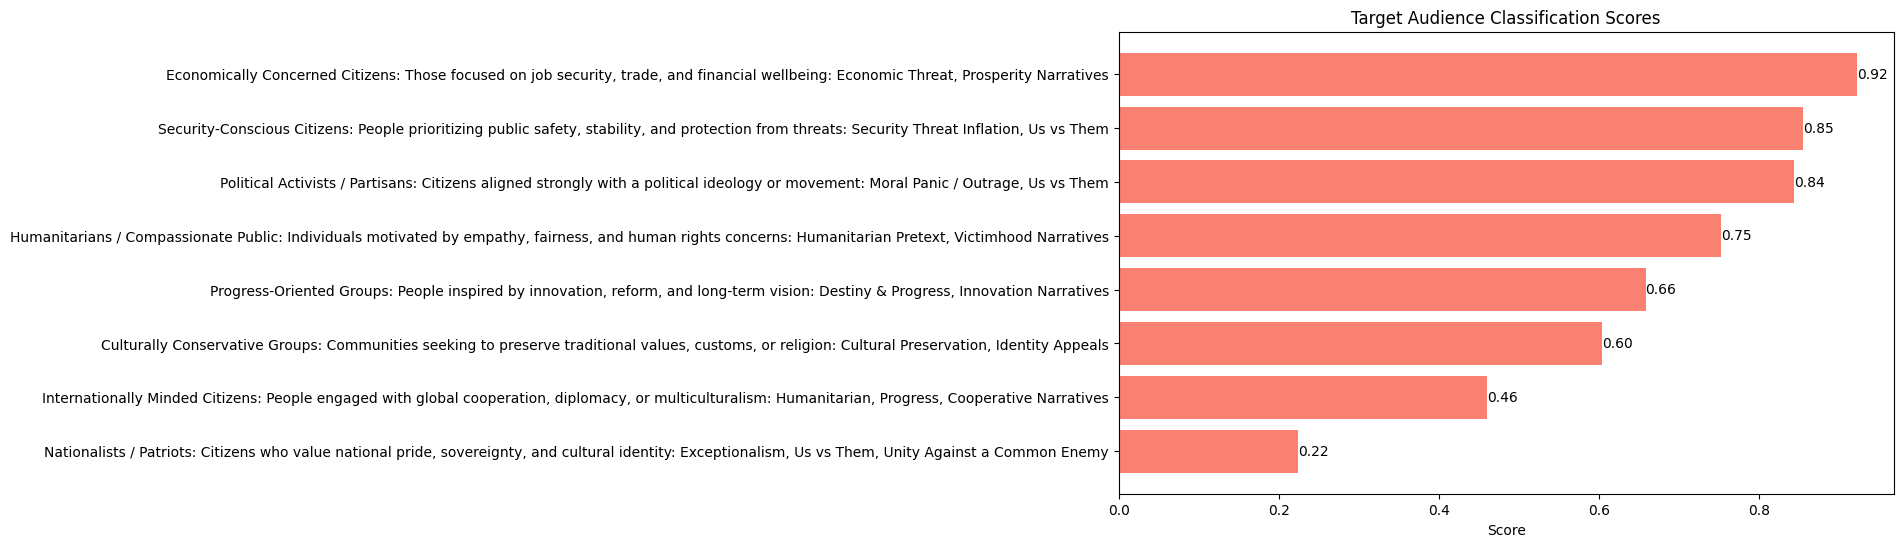

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming target_audience_results is available from the previous step
if 'target_audience_results' in locals() and target_audience_results:
    # Convert the results to a pandas DataFrame for plotting
    target_audience_df = pd.DataFrame({
        'Label': target_audience_results['labels'],
        'Score': target_audience_results['scores']
    })

    # Extract label name before '|' for plotting
    target_audience_df['Short_Label'] = target_audience_df['Label'].apply(lambda x: x.split(' |')[0] if ' |' in x else x)

    # Sort the DataFrame by score for better visualization
    target_audience_df = target_audience_df.sort_values(by='Score', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(target_audience_df['Short_Label'], target_audience_df['Score'], color='salmon')
    plt.xlabel('Score')
    plt.title('Target Audience Classification Scores')
    plt.gca().invert_yaxis() # To show the highest score at the top

    # Add the score values as text labels on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("Error: target_audience_results not found. Please run the target audience classification cell first.")

In [36]:
from transformers import pipeline
from newspaper import Article

# Load zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define classification labels
narrative_rhetoric_labels = ['Neutral or Everyday Event |: Article describes ordinary events such as business openings, cultural celebrations, or routine community updates without political, ideological, or conflict-driven framing, The city’s annual music festival drew thousands of attendees, celebrating local talent and community spirit, A local bakery opened its doors this week, offering fresh bread and pastries to the neighborhood.',
    'Unclear or Minimal Rhetoric | : Article lacks enough information to determine a strong persuasive or ideological framing. Statements are mostly factual or ambiguous without clear narrative intent, Authorities have not confirmed the source of the unusual sounds reported near the harbor,Officials have released few details about the recent outage, leaving the cause uncertain' ,
    'Us vs Them |: Frames one group as morally superior and the other as dangerous, inferior or untrustworthy, Foreign powers are undermining our sovereignty, threatening our very way of life, Our nation faces an existential threat from foreign corporations trying to dictate our economy,',
    'Exceptionalism | : Claims a nation or group is unique, morally superior, or destined for a special role in the world. Our nation is destined to lead the world into a new era of progress and enlightenment, Only our people have the vision and moral courage to guide the world out of crisis',
    'Security Threat Inflation |: Exaggerates or amplifies the scale of a threat to justify urgent or extreme action, Authorities warn that the recent cyberattacks are only the beginning of more severe threats to come, President cited ‘national security’ concerns as a reason for the import tax hike, The actions of the a countrys Federation continue to pose a threat to another countrys security ',
    'Humanitarian Pretext |: Presents intervention or policy as purely altruistic and compassionate, masking strategic goals. Our intervention is purely for humanitarian purposes — to save lives and protect the innocent. Military presence in the region is necessary to protect innocent civilians from further harm, A countrys continued military actions in another country constituted a national emergency',
    'Moral Panic or Outrage |: Focuses on moral or ethical violations to spark strong emotional reactions in the public.Parents are outraged after a controversial new book was introduced into the school curriculum. Community leaders are demanding an immediate ban on the controversial artwork that has shocked the public. Leader slaps 50 percent tariff on one countrys goods over imports of other countrys oil',
    'Victimhood or Persecution | Narrative: Portrays own group as unfairly targeted, oppressed, or under attack.We have been oppressed and silenced for decades, yet we continue to fight for justice. Our culture has been systematically targeted and erased from public life.One country punished while other importers not targeted',
    'Destiny & Progress |: Frames events as part of inevitable historical progress or being on the right side of history, This breakthrough is part of humanity’s unstoppable march toward a brighter tomorrow, This infrastructure project marks the beginning of a new era of prosperity for our nation',
    'Unity Against a Common Enemy |: Calls for cohesion and solidarity by identifying and opposing a shared adversary.We must stand together to protect our community from those who wish to destroy it, If we do not unite now, our adversaries will succeed in dismantling everything we have built together.']

appeal_type_labels = [
    'Pathos | Emotional appeal: targets fear, pride, anger, compassion, hope, justice, jealousy, love, patriotism, pity, sympathy, vivid language,  eg: our way of life is under threat, Foreign powers are undermining our sovereignty, threatening our very way of life, Authorities warn that the recent cyberattacks are only the beginning of more severe threats to come,Our intervention is purely for humanitarian purposes — to save lives and protect the innocent, Parents are outraged after a controversial new book was introduced into the school curriculum, We have been oppressed and silenced for decades, yet we continue to fight for justice. Our nation faces an existential threat from foreign corporations trying to dictate our economy. If we do not unite now, our adversaries will succeed in dismantling everything we have built together' ,
    'Logos | Logical/ pragmatic appeal: uses statistics, facts, rational arguments, reason, evidence, logic, anecdotes, case studies, analogies, comparisons, cause and effect, proof, eg: data shows crime has doubled, A local bakery opened its doors this week, Officials have released few details about the recent outage, leaving the cause uncertain. ' ,
    'Ethos | Credibility appeal: leans on authority, moral standing, expertise, impartiality, confidence in delivery, honesty, fairness, reliability, trustworthy, educated, cites credible sources, reputation, President cited ‘national security’ concerns as a reason for the import tax hike, '
]

target_audience_labels = [
    "Nationalists or Patriots |: Citizens who value national pride, sovereignty, and cultural identity: Exceptionalism, Us vs Them, Unity Against a Common Enemy",
    "Security‑Conscious Citizens |: People prioritizing public safety, stability, and protection from threats: Security Threat Inflation, Us vs Them",
    "Humanitarians or Compassionate Public |: Individuals motivated by empathy, fairness, and human rights concerns: Humanitarian Pretext, Victimhood Narratives",
    "Progress‑Oriented Groups |: People inspired by innovation, reform, and long‑term vision: Destiny & Progress, Innovation Narratives",
    "Culturally Conservative Groups |: Communities seeking to preserve traditional values, customs, or religion: Cultural Preservation, Identity Appeals",
    "Economically Concerned Citizens |: Those focused on job security, trade, and financial wellbeing: Economic Threat, Prosperity Narratives",
    "Political Activists or Partisans |: Citizens aligned strongly with a political ideology or movement: Moral Panic / Outrage, Us vs Them",
    "Internationally Minded Citizens |: People engaged with global cooperation, diplomacy, or multiculturalism: Humanitarian, Progress, Cooperative Narratives"
]


def analyze_article_and_summarize(url):
    """Fetches article, performs classifications, and returns a summary."""

    try:
        article = Article(url)
        article.download()
        article.parse()
        text = article.text.strip()
    except Exception as e:
        return {"error": f"Error fetching article: {e}"}

    if not text:
        return {"error": "Could not extract text from article."}

    # Classify narrative rhetoric
    narrative_rhetoric_results = classifier(text, narrative_rhetoric_labels, multi_label=True)
    # Get top 3 narrative rhetoric labels and scores, extracting label name before '|'
    top_3_narrative = sorted(zip(narrative_rhetoric_results['labels'], narrative_rhetoric_results['scores']), key=lambda x: x[1], reverse=True)[:3]
    top_3_narrative_formatted = [(label.split(' |')[0], score) for label, score in top_3_narrative]


    # Classify appeal type
    appeal_type_results = classifier(text, appeal_type_labels, multi_label=True)
    # Get top 3 appeal type labels and scores, extracting label name before '|'
    top_3_appeal = sorted(zip(appeal_type_results['labels'], appeal_type_results['scores']), key=lambda x: x[1], reverse=True)[:3]
    top_3_appeal_formatted = [(label.split(' |')[0], score) for label, score in top_3_appeal]


    # Classify target audience
    target_audience_results = classifier(text, target_audience_labels, multi_label=True)
    # Get top 3 target audience labels and scores, extracting label name before '|'
    top_3_target_audience = sorted(zip(target_audience_results['labels'], target_audience_results['scores']), key=lambda x: x[1], reverse=True)[:3]
    top_3_target_audience_formatted = [(label.split(' |')[0], score) for label, score in top_3_target_audience]


    return {
        "top_3_narrative_rhetoric": top_3_narrative_formatted,
        "top_3_appeal_type": top_3_appeal_formatted,
        "top_3_target_audience": top_3_target_audience_formatted
    }

# Example usage:
if __name__ == "__main__":
    article_url = input("Please enter the URL of a news article: ")
    summary_results = analyze_article_and_summarize(article_url)

    if "error" in summary_results:
        print(summary_results["error"])
    else:
        print("Narrative Rhetoric:")
        for label, score in summary_results['top_3_narrative_rhetoric']:
            print(f"- {label}: {score:.2f}")

        print("\nAppeal Type:")
        for label, score in summary_results['top_3_appeal_type']:
            print(f"- {label}: {score:.2f}")

        print("\nTarget Audience:")
        for label, score in summary_results['top_3_target_audience']:
            print(f"- {label}: {score:.2f}")

Device set to use cpu


Please enter the URL of a news article: https://www.aljazeera.com/news/2025/8/6/trump-imposes-25-percent-tariff-on-indian-goods-over-russian-oil
Narrative Rhetoric:
- Security Threat Inflation: 0.97
- Humanitarian Pretext: 0.85
- Unclear or Minimal Rhetoric: 0.84

Appeal Type:
- Ethos: 0.98
- Logos: 0.75
- Pathos: 0.35

Target Audience:
- Economically Concerned Citizens: 0.94
- Security‑Conscious Citizens: 0.88
- Political Activists or Partisans: 0.87


In [ ]:
%%writefile app.py

import streamlit as st
import os

# Set Hugging Face token from Colab secrets
os.environ['HF_TOKEN'] = st.secrets.get('HF_TOKEN')

def main():
    st.sidebar.title("Navigation")
    page = st.sidebar.radio("Go to", ["Home", "Rhetoric Detection", "Popular Rhetoric Timeline", "About"])

    st.title("NarrAItives")

    if page == "Home":
        home_page()
    elif page == "Rhetoric Detection":
        rhetoric_detection_page()
    elif page == "Popular Rhetoric Timeline":
        popular_rhetoric_timeline_page()
    elif page == "About":
        about_page()

def home_page():
    st.header("uncover the patterns shaping your world")
    st.write("Welcome to NarrAItives! This application helps you analyze news articles to understand the underlying rhetoric and identify potential target audiences.")
    st.write("Use the navigation on the left to explore different features of the app.")
    # Add any other content for the home page here

def rhetoric_detection_page():
    st.header("don't just read the news - read between the lines")
    st.write("Analyze the rhetoric used in a news article by entering its URL.")
    # Add the rhetoric detection functionality here

def popular_rhetoric_timeline_page():
    st.header("the story behind the story")
    st.write("Explore the trends of popular rhetoric over time.")
    # Add the timeline visualization here

def about_page():
    st.header("The media tells stories. We tell you why.")
    st.write("Learn more about the NarrAItives project and the team behind it.")
    # Add information about the project here

if __name__ == "__main__":
    main()

In [1]:
!streamlit run app.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://slimy-points-grow.loca.lt
^C
